![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/semantic_segmentation_brain_cancer.ipynb)

# Semantic Segmentation on Brain Cancer Dataset

This notebook provides and example of Gesund Validation with Segmentation

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Dataset Name: [Brats-3D Brain Tumour Segmentation Dataset](https://app.gesund.ai/data/dataset-details/dataset_667ecb5eb8a1ee0b39b4517f/overview)


To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Segmentation Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/annotation.json
# Segmentation Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/prediction.json
# Segmentation Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/test_class_mappings.json

--2024-12-04 13:21:55--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67241 (66K) [text/plain]
Saving to: ‘annotation.json.2’

annotation.json.2   100%[===================>]  65.67K  --.-KB/s    in 0.01s   

2024-12-04 13:21:55 (5.40 MB/s) - ‘annotation.json.2’ saved [67241/67241]

--2024-12-04 13:21:56--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `semantic segmentation validation` on your data. 

In [2]:
from gesund.validation import Validation

In [3]:
data_dir = "./tests/_data/semantic_segmentation"
plot_config = {
        'violin_graph': {'metrics':['Acc', 'Spec','AUC'], 'threshold': 0.5}, 
        'plot_by_meta_data': {'meta_data_args': [ 'FalsePositive','Dice Score','mean Sensitivity','mean AUC','Precision','AverageHausdorffDistance','SimpleHausdorffDistance']}, 
        'overall_metrics': {'overall_args': ['mean AUC', 'fwIoU','mean Sensitivity']}, 
        'classbased_table': {'classbased_table_args': 0.5}, 
        'blind_spot': {'blind_spot_args': ['fwIoU','mean IoU','mean Sensitivity','mean Specificity','mean Kappa','mean AUC','']}, 
    }

#### Explanation of plot config values and keys

<hr />

`violin_graph`
- metrics: A list of metrics to be plotted on the violin graph (e.g., ['Acc', 'Spec', 'AUC']). These metrics typically refer to Accuracy (Acc), Specificity (Spec), and Area Under the Curve (AUC).
- threshold: A numerical value (0.5) that might be used as a cut-off or threshold for the violin graph analysis.

`plot_by_meta_data`
- meta_data_args: A list of metadata arguments for plotting (e.g., ['FalsePositive', 'Dice Score', 'mean Sensitivity', 'mean AUC', 'Precision', 'AverageHausdorffDistance', 'SimpleHausdorffDistance']). These terms represent various statistical metrics and measurements used in analysis.
- FalsePositive: Instances where the model incorrectly predicts a positive class.
- Dice Score: A metric used to gauge the similarity between two sets.
- mean Sensitivity: The average sensitivity, which measures the true positive rate.
- mean AUC: The average Area Under the Curve, which measures the ability of the model to distinguish between classes.
- Precision: The ratio of true positive predictions to the total predicted positives
- AverageHausdorffDistance: A measure of the distance between predicted and actual points.
- SimpleHausdorffDistance: Another variant of the Hausdorff Distance, often simplified for specific use cases.

`overall_metrics`
- overall_args: A list of overall metrics (e.g., ['mean AUC', 'fwIoU', 'mean Sensitivity']). These metrics are used for evaluating the overall performance of the model.
- mean AUC: The average Area Under the Curve.
- fwIoU: Frequency-weighted Intersection over Union, a metric used for object detection and segmentation.
- mean Sensitivity: The average sensitivity, which measures the true positive rate.

`classbased_table`
- classbased_table_args: A threshold value (0.5) used for the class-based table metrics. This likely refers to a cut-off value for evaluating the metrics in the table.

`blind_spot`
- blind_spot_args: A list of metrics related to blind spot analysis (e.g., ['fwIoU', 'mean IoU', 'mean Sensitivity', 'mean Specificity', 'mean Kappa', 'mean AUC', '']). These metrics help identify and analyze areas where the model's performance may be lacking or biased.
- fwIoU: Frequency-weighted Intersection over Union.
- mean IoU: The average Intersection over Union.
- mean Sensitivity: The average sensitivity.
- mean Specificity: The average specificity, which measures the true negative rate.
- mean Kappa: The average Cohen's Kappa, which measures the agreement between predicted and actual classifications.
- mean AUC: The average Area Under the Curve.

<hr />

In [4]:
sem_segment_validation = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    problem_type="semantic_segmentation",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    data_format="json",
    json_structure_type="gesund",
    metadata_path=f"{data_dir}/test_metadata.json",
    return_dict=True,
    display_plots=False,
    store_plots=False,
    plot_config=plot_config,
    run_validation_only=True
)

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
metadata path validated !


#### Argument Explanations

<hr />

The argumment input consists of the data path and parameters.

1. Annotation data: `annotations_path`:  the path of the json file containing the annotation data with respect to the images.
The structure of the annotation should be as follows

```
{
   "image_id_value": {
	"image_id": image_id_value,
	"annotation": [
	  {
		"image_id": "image_id_value",
		"label": integer_class_value,
		"type": "mask",
		"measurement_info": {
			"objectName": "mask",
			"measurement": "Segmentation"
		},
		"mask": {
			"mask": "RLE string of the mask"
		},
		"shape": [width, height],
		"window_level": Null
	  },
	   ...
	]
   }
}
```


2. Prediction: `predictions_path`: the json file path containing the prediction data with respect to the images.
The structure of the prediction could be as follows, if the input data is from the 

```
{
   "image_id_value": {
	"image_id": "image_id_value",
	"shape": [width, height],
	"masks": {
		"rles": [
			{
				"rle": "RLE encoded string",
				"class": integer label
			},
			...
		]
	},
    },
    ...
}

```

3. Label dictionary: `class_mappings`: Label mapping of the class labels

```
{"0": "background", "1": "necrotic_core", "2": "edema", "3": "enhancing"}
```

4. Problem Type: `problem_type`: Type of the problem in this context is `semantic segmentation` 

5. Format: `data_format`: Format of the json file could be 'coco', 'yolo' or 'gesund_format'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

6. JSON structure type: `json_structure_type`: could be 'coco', 'yolo' or 'gesund'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

7. Metadata path: `metadata_path`: Path directing the metadata file. Please note the data format of the metadata should be the same as prediction / annnotation file format

8. Return dictionary: `return_dict`: boolean value flag indicating if the results are supposed to be returned. When true, ResultDataClassification object is returned.

9. Display plot: `display_plots`: boolean value flag indicating if the plots are required to be displayed.

10. Store plots: `store_plots`: boolean value flag indicating if the plots are required to be stored.

11. Plot config: `plot_config`: dictionary containing the configurations required for the plot

12. Run validation only: `run_validation_only`: boolean value flag indicating if to run validation only.

<hr />

## <a id="results">Explore Results</a>

In [5]:
results = sem_segment_validation.run()

Loss not found.


Calling all plot functions:   0%|          | 0/9 [00:00<?, ?it/s]

Calling method: plot_blind_spot_metrics...


Calling all plot functions:  11%|█         | 1/9 [00:01<00:14,  1.82s/it]

Calling method: plot_highlighted_overall_metrics...


Calling all plot functions:  22%|██▏       | 2/9 [00:02<00:09,  1.31s/it]

Calling method: plot_iou_distribution...
Calling method: plot_main_metric...


Calling all plot functions:  44%|████▍     | 4/9 [00:03<00:03,  1.29it/s]

Calling method: plot_meta_distribution...
Calling method: plot_metrics_by_meta_data...
Calling method: plot_statistics_classbased_table...


Calling all plot functions: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]

Calling method: plot_top_misses...
Calling method: plot_violin_graph...


When you run the above cell, logs will appear stating the progress of the validation execution. The results could be explained, the `results` returned by the `run_metrics` and the `outputs` folder produced in the process are the same only in different forms. To understand in detail about what validation metrics mean, please visit the explaination <a href="https://gesund-ai.github.io/validation_metrics.html">here</a>


Following is the directory structure of the folder.
```
-- outputs
 |- batch_job_id  
   |- plot_jsons  # json files
      |- main_metric.json
      ...
   |- plot 
      |- blind_spot.png
      ... 
```


results.__fields__

<hr/>

Results: `results`: consists of following fields 
- `plot_blind_spot_metrics`: contains the data for bar plots to consisting of metrics like fwIOU, mean IoU, mean sensitivity, mean specificity, mean kappa, and mean AUC
- `plot_highlighted_overall_metrics`: contains the data for plotting mean average preicion and recall at specific thresholds
- `plot_iou_distribution`: contains the data to plot bar plot for false positive, dice score, mean sensitivit, mean AUC, precision, average Hausdorff distance, simple hausdorff distance
- `plot_main_metric`: data to plot the mean average precision value at 10 threshold.
- `plot_meta_distribution`: contains the data for plotting bar charts where the data is plotted only when metadata is available in the input
- `plot_metrics_by_meta_data`: 
- `plot_statistics_classbased_table`: The class based table metrics provides the bar chart information for each class involved in the validation metrics like % of good contours, average Haundroff distance, DICE, fwIoU, mean AUC, mean IoU, mean Kappa, mean sensitivity, mean specificity, and mean Kappa
- `plot_top_misses`: ranks the top images corresponding to the mean intersection over union values.
- `plot_violin_graph`: contains the data to plots the distribution of accuracy, specificity and AUC

<hr/>

In [8]:
sem_segment_validation.__dict__

{'user_params': UserInputParams(annotations_path='./tests/_data/semantic_segmentation/gesund_custom_format/annotation.json', predictions_path='./tests/_data/semantic_segmentation/gesund_custom_format/prediction.json', class_mapping='./tests/_data/semantic_segmentation/test_class_mappings.json', problem_type='semantic_segmentation', json_structure_type='gesund', data_format='json', plot_config={'violin_graph': {'metrics': ['Acc', 'Spec', 'AUC'], 'threshold': 0.5}, 'plot_by_meta_data': {'meta_data_args': ['FalsePositive', 'Dice Score', 'mean Sensitivity', 'mean AUC', 'Precision', 'AverageHausdorffDistance', 'SimpleHausdorffDistance']}, 'overall_metrics': {'overall_args': ['mean AUC', 'fwIoU', 'mean Sensitivity']}, 'classbased_table': {'classbased_table_args': 0.5}, 'blind_spot': {'blind_spot_args': ['fwIoU', 'mean IoU', 'mean Sensitivity', 'mean Specificity', 'mean Kappa', 'mean AUC', '']}}, metadata_path='./tests/_data/semantic_segmentation/test_metadata.json', return_dict=True, display

#### Class instance attributes

<hr />

1. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided

2. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

3. `batch_job_id`: Id of the batch execution. This helps in running multiple validation runs with same batch id. Usign the batch id it is possible to organize and segregate the results.

4. `output_dir`: Directory of the output

5. `problem_type_result_map`: Mapping of result data schema corresponding to the problem type




<hr />

#### Output JSON file breakdown

The JSON files are found under the 

```
outputs/
|- batch_job_id
   |- plot_jsons
```

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [ ]:
batch_id = sem_segment_validation.batch_job_id
folder_path = os.path.join(*["outputs", batch_id, "plot_jsons"])
folder_path

'outputs/6728c99f75c62d4e442ffe65/plot_jsons'

As mentioned above the JSON files contains the same data as in the result variable. The files are provided for persistent storage of data.

#### Output plot breakdown

The plots could be found under the following folder location

```
outputs/
|- batch_job_id
   |- plots
```

In [7]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [ ]:
batch_id = sem_segment_validation.batch_job_id
image_folder = os.path.join(*["outputs", batch_id, "plots"])

def load_image(image_file):
    img_path = os.path.join(image_folder, image_file) 
    img = mpimg.imread(img_path) 
    plt.imshow(img)
    plt.axis("off")

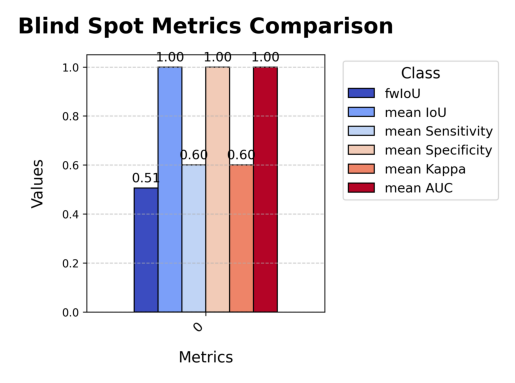

In [9]:
load_image("blind_spot.png")

`Blind spot metrics comparison` consisting of metrics like fwIOU, mean IoU, mean sensitivity, mean specificity, mean kappa, and mean AUC

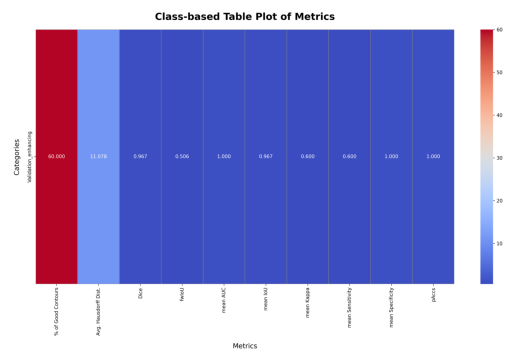

In [10]:
load_image("classbased_table.png")

`Class-based Table metrics` The class based table metrics provides the bar chart information for each class involved in the validation metrics like % of good contours, average Haundroff distance, DICE, fwIoU, mean AUC, mean IoU, mean Kappa, mean sensitivity, mean specificity, and mean Kappa

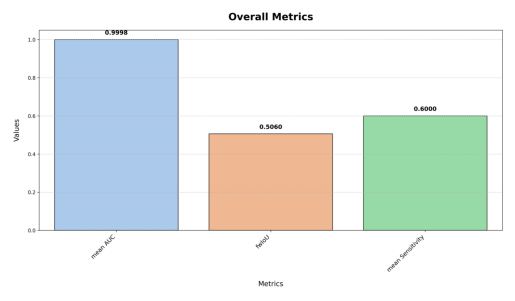

In [11]:
load_image("overall_metrics.png")

`Overall metrics` The plot describes the overall metrics like mean AUC, fwIOU, mean sensitivity

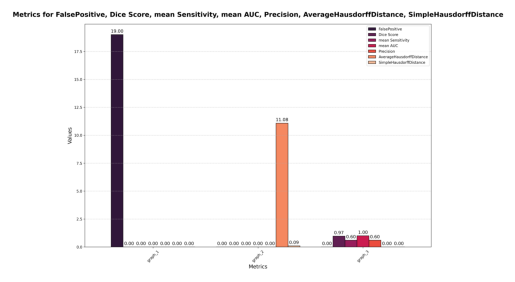

In [12]:
load_image("plot_by_meta_data.png")

`Plot by meta data` plots bar plot for false positive, dice score, mean sensitivit, mean AUC,
precision, average Hausdorff distance, simple hausdorff distance

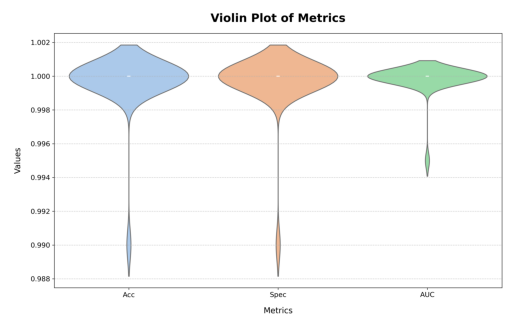

In [13]:
load_image("violin_graph.png")

`Violin plot of metrics` plots the distribution of accuracy, specificity and AUC